# Lab 5

# Karthik Kumar Reddy Kota


# Question 1: Perform Transfer Learning with Resnet

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [ ]:

model = ResNet50(
    include_top=True,
     input_shape=(224,224,3))
for layer in model.layers:
    layer.trainable = False

flatten_layer = layers.Flatten()(model.output)
flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer)
flattened_fc_softmax_layer = layers.Dense(5, activation='softmax')(flattened_fc_layer)
model = Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep_Learning/lab5/test', batch_size=64, target_size=(100,100))

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep_Learning/lab5/train', batch_size=64, target_size=(100,100))


Found 1228 images belonging to 5 classes.
Found 3152 images belonging to 5 classes.


In [ ]:
#Compile and fit the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#history = model.fit(training_iterator, validation_data = testing_iterator, epochs=1)

In [ ]:
#save the model
#model.save('flower_baseline_model.h5')

In [ ]:
#get the class labels from iterator
class_labels = training_iterator.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


# {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

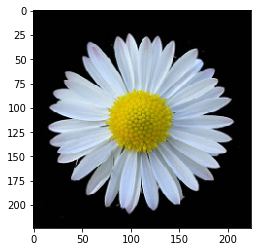

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('daisy.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()

In [ ]:

img = img_to_array(img)
img = img.reshape(1,224,224,3)

In [ ]:

result = model.predict(img)
class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


1
dandelion


# Question 2: Do Training for Non-Dense layers while using Transfer learning

# Question 3: Change the flowers dataset by doing edge detection and then apply all the non-transfer learning and transfer models

In [ ]:
import numpy as np
import argparse
import glob
import cv2

In [ ]:
def edge(image):
  outline = cv2.Canny(image, 30, 150)
  return outline

In [ ]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [ ]:
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep_Learning/lab5/test1', batch_size=64, target_size=(100,100))

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep_Learning/lab5/train1', batch_size=64, target_size=(100,100))


Found 108 images belonging to 5 classes.
Found 298 images belonging to 5 classes.


In [ ]:
testing_iterator=auto_canny(testing_iterator)
training_iterator = auto_canny(training_iterator)

sequential model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = keras.Sequential()

In [ ]:

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam')

In [ ]:
class_labels = training_iterator.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/image_00147.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,100,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


VGG16 model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
model = VGG16(include_top=False, input_shape=(224,224,3))

for layer in model.layers:
    layer.trainable = False

In [ ]:

flatten_layer = layers.Flatten()(model.output)


flattened_fc_layer = layers.Dense(512, activation='softmax')(flatten_layer)


flattened_fc_softmax_layer = layers.Dense(5, activation='softmax')(flattened_fc_layer)


model = Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)


In [ ]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam')

In [ ]:
class_labels = training_iterator.class_indices
print(class_labels)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/image_00147.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,224,224,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


# Question 4: Look at the Weights Repository- TensorFlowHub and Implement new models on 102 Oxford Flowers Dataset

Link: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/



sequential model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [ ]:
model = keras.Sequential()

In [ ]:

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep_Learning/lab5/test', batch_size=64, target_size=(100,100))

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep_Learning/lab5/train', batch_size=64, target_size=(100,100))


Found 1228 images belonging to 5 classes.
Found 3152 images belonging to 5 classes.


In [ ]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam')

In [ ]:
class_labels = training_iterator.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


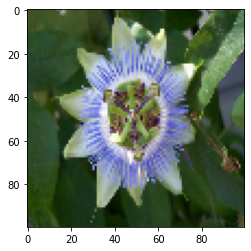

2
rose


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/image_00147.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,100,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


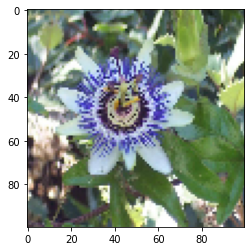

2
rose


In [ ]:

img = load_img('/content/image_00148.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,100,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


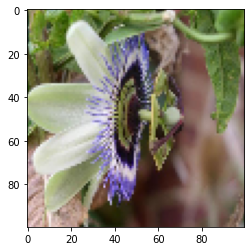

2
rose


In [ ]:

img = load_img('/content/image_00150.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,100,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


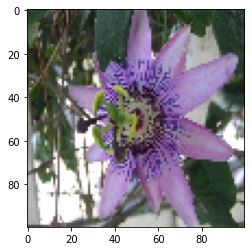

2
rose


In [ ]:

img = load_img('/content/image_00151.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,100,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


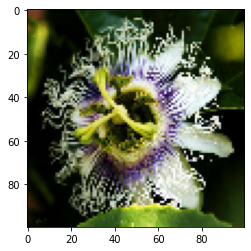

2
rose


In [ ]:

img = load_img('/content/image_00152.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,100,3)

result = model.predict(img)
class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


VGG16 model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
model = VGG16(include_top=False, input_shape=(224,224,3))

for layer in model.layers:
    layer.trainable = False

In [ ]:

flatten_layer = layers.Flatten()(model.output)


flattened_fc_layer = layers.Dense(512, activation='softmax')(flatten_layer)


flattened_fc_softmax_layer = layers.Dense(5, activation='softmax')(flattened_fc_layer)


model = Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)
testing_iterator = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep_Learning/lab5/test', batch_size=64, target_size=(100,100))

training_iterator = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep_Learning/lab5/train', batch_size=64, target_size=(100,100))


Found 1228 images belonging to 5 classes.
Found 3152 images belonging to 5 classes.


In [ ]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam')

In [ ]:
class_labels = training_iterator.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


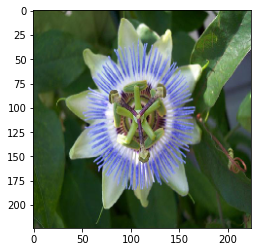

4
tulip


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/image_00147.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,224,224,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


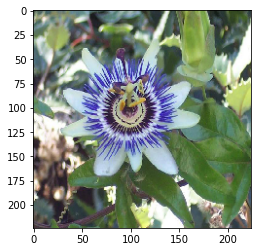

3
sunflower


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/image_00148.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,224,224,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


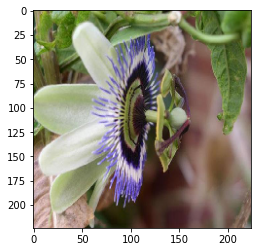

0
daisy


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/image_00150.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,224,224,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


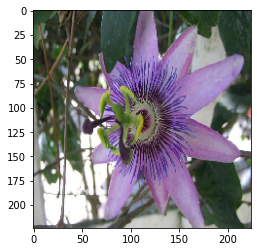

0
daisy


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/image_00151.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,224,224,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])


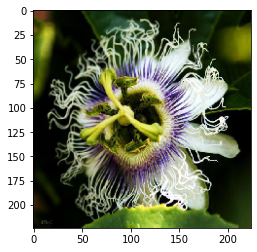

1
dandelion


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('/content/image_00152.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,224,224,3)

class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

result = model.predict(img)
result = np.argmax(result)
print(result)

print([key for key in class_labels][result])
